In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import read_1d_dataset
sns.set_context('talk')
import pint
ureg = pint.UnitRegistry()

/Users/smil/anaconda3/lib/python3.7/site-packages/distributed/utils.py:139: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 51] Network is unreachable
  RuntimeWarning,


In [2]:
ds = read_1d_dataset(folder='.', units='cgs')
ds

<xarray.Dataset>
Dimensions:      (time: 92, x: 800)
Coordinates:
  * time         (time) float64 0.0 0.0003286 0.01009 ... 0.8801 0.89 0.9001
  * x            (x) float64 0.1 0.2 0.3 0.4 0.5 ... 79.6 79.7 79.8 79.9 80.0
Data variables:
    Density      (time, x) float64 0.01 0.01 0.01 ... 0.001152 0.00113 0.001081
    Sound Speed  (time, x) float64 4.082 4.082 4.082 4.082 ... 111.9 111.2 109.6
    Pressure     (time, x) float64 0.001 0.001 0.001 ... 0.0866 0.08388 0.07802
    x_velocity   (time, x) float64 0.0 0.0 0.0 0.0 ... 96.6 99.15 101.9 106.3
    y_velocity   (time, x) float64 0.0 0.0 0.0 ... -7.272e-15 -6.188e-15

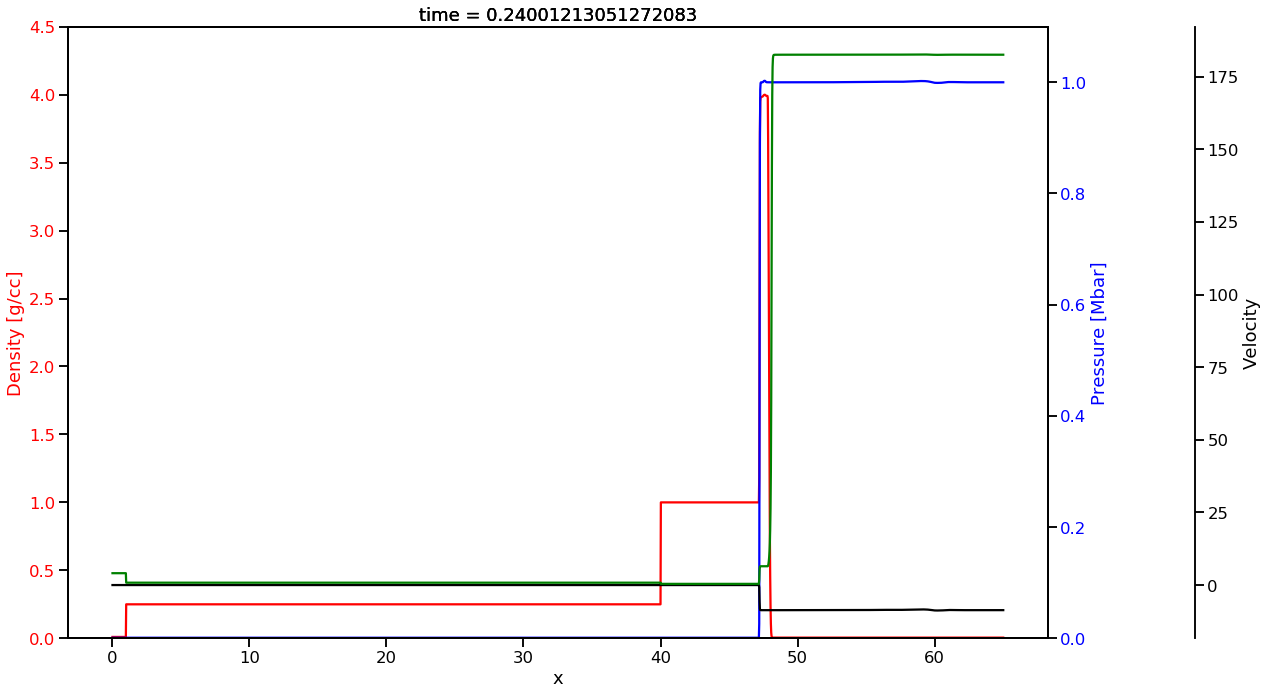

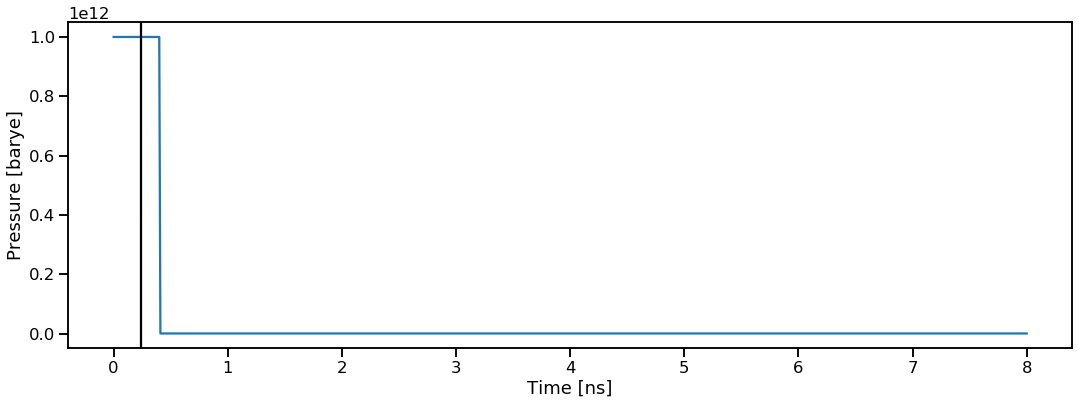

In [134]:
fig, rho_ax = plt.subplots(figsize=(18,10))
ds = read_1d_dataset(folder='.', units='cgs')
p_ax = rho_ax.twinx()
t=-1

color = 'r'
ds.Density[t].plot(ax=rho_ax,color=color)
rho_ax.set_ylabel('Density [g/cc]', color=color)
rho_ax.tick_params(axis='y', labelcolor=color)
rho_ax.set_ylim(0,4.5)
color='b'
ds.Pressure[t].plot(ax=p_ax,color=color)
p_ax.set_ylabel('Pressure [Mbar]', color=color)
p_ax.tick_params(axis='y', labelcolor=color)
p_ax.set_ylim(0,1.1)

v_ax = rho_ax.twinx()
color='k'
ds.x_velocity[t].plot(ax=v_ax, color=color)
ds["Sound Speed"][t].plot(ax=v_ax, color='g')

v_ax.set_ylabel('Velocity', color=color)
v_ax.spines["right"].set_position(("axes", 1.15))
v_ax.tick_params(axis='y', labelcolor=color)


# plt.xlim(30,45)
# v_ax.set_ylim(-3,-1)
# rho_ax.set_ylim(0,.01)
plt.tight_layout()
plt.show()

pulse = np.loadtxt('pressure_input.dat')
plt.figure(figsize=(18,6))
time = (pulse[:,0] * ureg('s')).to('ns').m
p = pulse[:,1] * ureg('barye')

plt.plot(time,p)
plt.axvline(x=ds.time[t].data, color='k')
plt.xlabel('Time [ns]')
plt.ylabel('Pressure [barye]')
plt.show()

In [ ]:
time.m

In [ ]:
gamma = 5./3.
p = 1e10
rho = .005
cs = np.sqrt(gamma * p / rho)
print(f"Cs: {cs:.4e}")

gamma = 5./3.
p = 1e9
rho = .001
cs = np.sqrt(gamma * p / rho)
print(f"Cs: {cs:.4e}")

In [ ]:
((50e-12)*ureg.seconds).to('ps')

In [ ]:
gamma=5.0/3.0
P1=1e7
P2=1e8
rho2=.001

rho1 = rho2*(P2/P1)**(1/gamma)
rho1

In [ ]:
pulse = np.loadtxt('pressure_input.dat')

data = (pulse[:,0] * ureg('ns')).to('s').m
power = (pulse[:,1] * ureg('Mbar')).to('barye').m
for d,p in zip(data, power):
    print(f"{d:.3e} {p:.3e}")

In [ ]:
theta_ib = np.pi/2.0
theta_ie = 0
# np.cos(theta_ie) - np.cos(theta_ib)
np.sin(theta_ie) - np.sin(theta_ib)

In [ ]:
np.sin(np.pi)